In [55]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("./AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.value_counts() #well, this didn't tell me a whole lot

id        name                                               host_id    host_name        neighbourhood_group  neighbourhood       latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
2539      Clean & quiet apt home by the park                 2787       John             Brooklyn             Kensington          40.64749  -73.97237  Private room     149    1               9                  2018-10-19   0.21               6                               365                 1
24082591  Haven In The Heights - Huge Manhattan 2BR 2 Bath!  44303500   Bruce & Suzanne  Manhattan            Washington Heights  40.84634  -73.93861  Entire home/apt  275    2               7                  2019-05-12   0.52               2                               0                   1
24083340  Your Dream 1 bed Apartment in the heart of SoHo    13460416   Jeremie          Manhattan            Little 

## Questions I'd like to answer here:

### 1) Where are the most expensive Airbnb rentals located?
My gut feelings is that price probably correlates highly with location (i.e. Manhattan will be more expensive than Brooklyn, which will be more expensive than Queens, etc.)...let's see if we can confirm that. Also, are there any obvious factors that elevate a rental above the average for its neighborhood? Could be something like near the water, has a good view of the city, near public transportation, etc.

### 2) Can we find evidence of Airbnbs "taking over" neighborhoods?
Airbnb was originally meant to help average people make a little extra money by renting out their extra spaces...extra rooms, vacation homes, etc. These days, though, there has been a lot of attention around the emergence of "Airbnb cities," where landlords have figured out that they can make more money by buying up properties to rent out indefinitely as short-term rentals rather than renting as long-term housing, and that's driven the cost of rents and mortgages up. NYC is often mentioned as one such city, so let's see if we can find some evidence of that happening: cases of the same landlord (host_id) having multiple properties, and especially multiple properties in the same neighborhoods at prices much higher than local rent. If we can find some neighborhoods to check out, local rent could be pretty easily sourced from Zillow or somewhere similar.

### 3) What is the most profitable Airbnb strategy for a landlord in NYC?
This data set doesn't directly tell us how many times a given Airbnb was rented in the past month, but maybe we can make a reasonable guess about occupancy using some other fields. If so, is it more profitable on average for an Airbnb host to have a more expensive unit that rents less frequently or a middle-of-the-market unit that is often rented out? What's the sweet spot for NYC?

### Bonus: Can we train a model to predict nightly rental price of a given Airbnb after some data cleaning?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

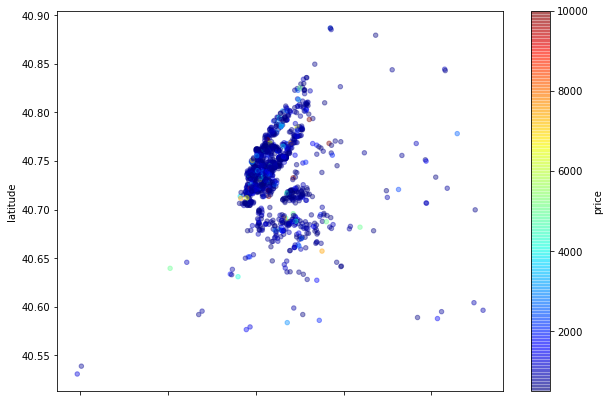

In [62]:
df[df['price'] >= 500].plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7), c='price', cmap=plt.get_cmap("jet"), colorbar=True)

In [61]:
df.groupby('host_id').count()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,,
2438,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2571,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2787,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2845,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2868,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274273284,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
274298453,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
274307600,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
